In [1]:
!nvidia-smi

Mon Apr  1 03:24:46 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# Install necessary packages

In [2]:
!pip install ultralytics

In [4]:
!pip install roboflow

# Import required libraries

In [3]:
from ultralytics import YOLO
from roboflow import Roboflow

# Download dataset from Roboflow

In [5]:
rf = Roboflow(api_key="LTpT6Qjy7cU4K0MGGjVk")
project = rf.workspace("litter-raking-project").project("smart-poultry-farm-litter-raking")
version = project.version(3)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.40, to fix: `pip install ultralytics==8.0.196`


# Check the downloaded files

In [6]:
!ls

sample_data  smart-poultry-farm-litter-raking-3


# Change directory to the downloaded dataset folder

In [7]:
%cd /content/smart-poultry-farm-litter-raking-3

/content/smart-poultry-farm-litter-raking-3


Check the files

In [8]:
!ls

data.yaml  README.dataset.txt  README.roboflow.txt  runs  test	train  valid  yolov8n.pt


# Train the YOLOv8 model

In [9]:
# Build a new model from YAML and start training from scratch
!yolo detect train data=data.yaml model=yolov8m.yaml epochs=20 batch=6 save=True imgsz=640 optimizer='auto'  resume=True plots=True amp=True

Ultralytics YOLOv8.1.40 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.yaml, data=data.yaml, epochs=20, time=None, patience=100, batch=6, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=None, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line

In [11]:
!ls

data.yaml  README.dataset.txt  README.roboflow.txt  runs  test	train  valid  yolov8n.pt


# Mount Google Drive


In [13]:
import os
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [14]:
# # Define the output directory path in Google Drive
# output_dir = '/content/drive/MyDrive/YOLOv8_Training_Results'

# # Create the output directory if it doesn't exist
# if not os.path.exists(output_dir):
#     os.makedirs(output_dir)

# # Print the output directory path for verification
# print('Output Directory:', output_dir)


Output Directory: /content/drive/MyDrive/YOLOv8_Training_Results


# Copy the training results to Google Drive

In [20]:
%cp -r /content/smart-poultry-farm-litter-raking-3/runs/detect /content/drive/MyDrive/Litte-Racking-Project-files\ Drive


# Perform validation

In [17]:
# Validation
!yolo detect val  model=/content/smart-poultry-farm-litter-raking-3/runs/detect/train2/weights/best.pt  data=/content/smart-poultry-farm-litter-raking-3/data.yaml imgsz=640 save_json=True save_hybrid=True

Ultralytics YOLOv8.1.40 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/smart-poultry-farm-litter-raking-3/valid/labels.cache... 1181 images, 0 backgrounds, 0 corrupt: 100% 1181/1181 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 74/74 [00:35<00:00,  2.11it/s]
                   all       1181       2223          1      0.999      0.995      0.995
                 human       1181       1089          1      0.998      0.995      0.995
               machine       1181       1134          1          1      0.995      0.995
Speed: 1.0ms preprocess, 20.1ms inference, 0.0ms loss, 2.5ms postprocess per image
Saving runs/detect/val/predictions.json...
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


# Perform testing and prediction

In [19]:
# Test
!yolo detect predict  model=/content/smart-poultry-farm-litter-raking-3/runs/detect/train2/weights/best.pt conf=0.25 source=/content/smart-poultry-farm-litter-raking-3/test/images show=True save=True save_txt=True save_conf=True show_labels=True show_conf=True show_boxes=True

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

Ultralytics YOLOv8.1.40 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs

image 1/603 /content/smart-poultry-farm-litter-raking-3/test/images/-trashed-1713364327-vf_how-to-do-Litter-raking-in-poultry-farm-_chicken-_farming-_poultrytreatment-_poultrydiseases-480P-_11000_jpeg_jpg.rf.e3eceffa14a1caa23fda46f08a9d9ca7.jpg: 640x640 1 human, 1 machine, 39.5ms
image 2/603 /content/smart-poultry-farm-litter-raking-3/test/images/-trashed-1713364335-vf_how-to-do-Litter-raking-in-poultry-farm-_chicken-_farming-_poultrytreatment-_poultrydiseases-480P-_6000_jpeg_jpg.rf.d2f0e790565f6d06966e1621e271d447.jpg: 640x640 1 human, 1 machine, 37.2ms
image 3/603 /content/smart-poultry-farm-litter-raking-3/test/images/-trashed-1713364337-vf_how-to-do-Litter-raking-in-poultry-farm-_chicken-_farming-_poultrytreatment-_poultrydiseases-480P-_5000

# Visualize the confusion matrix

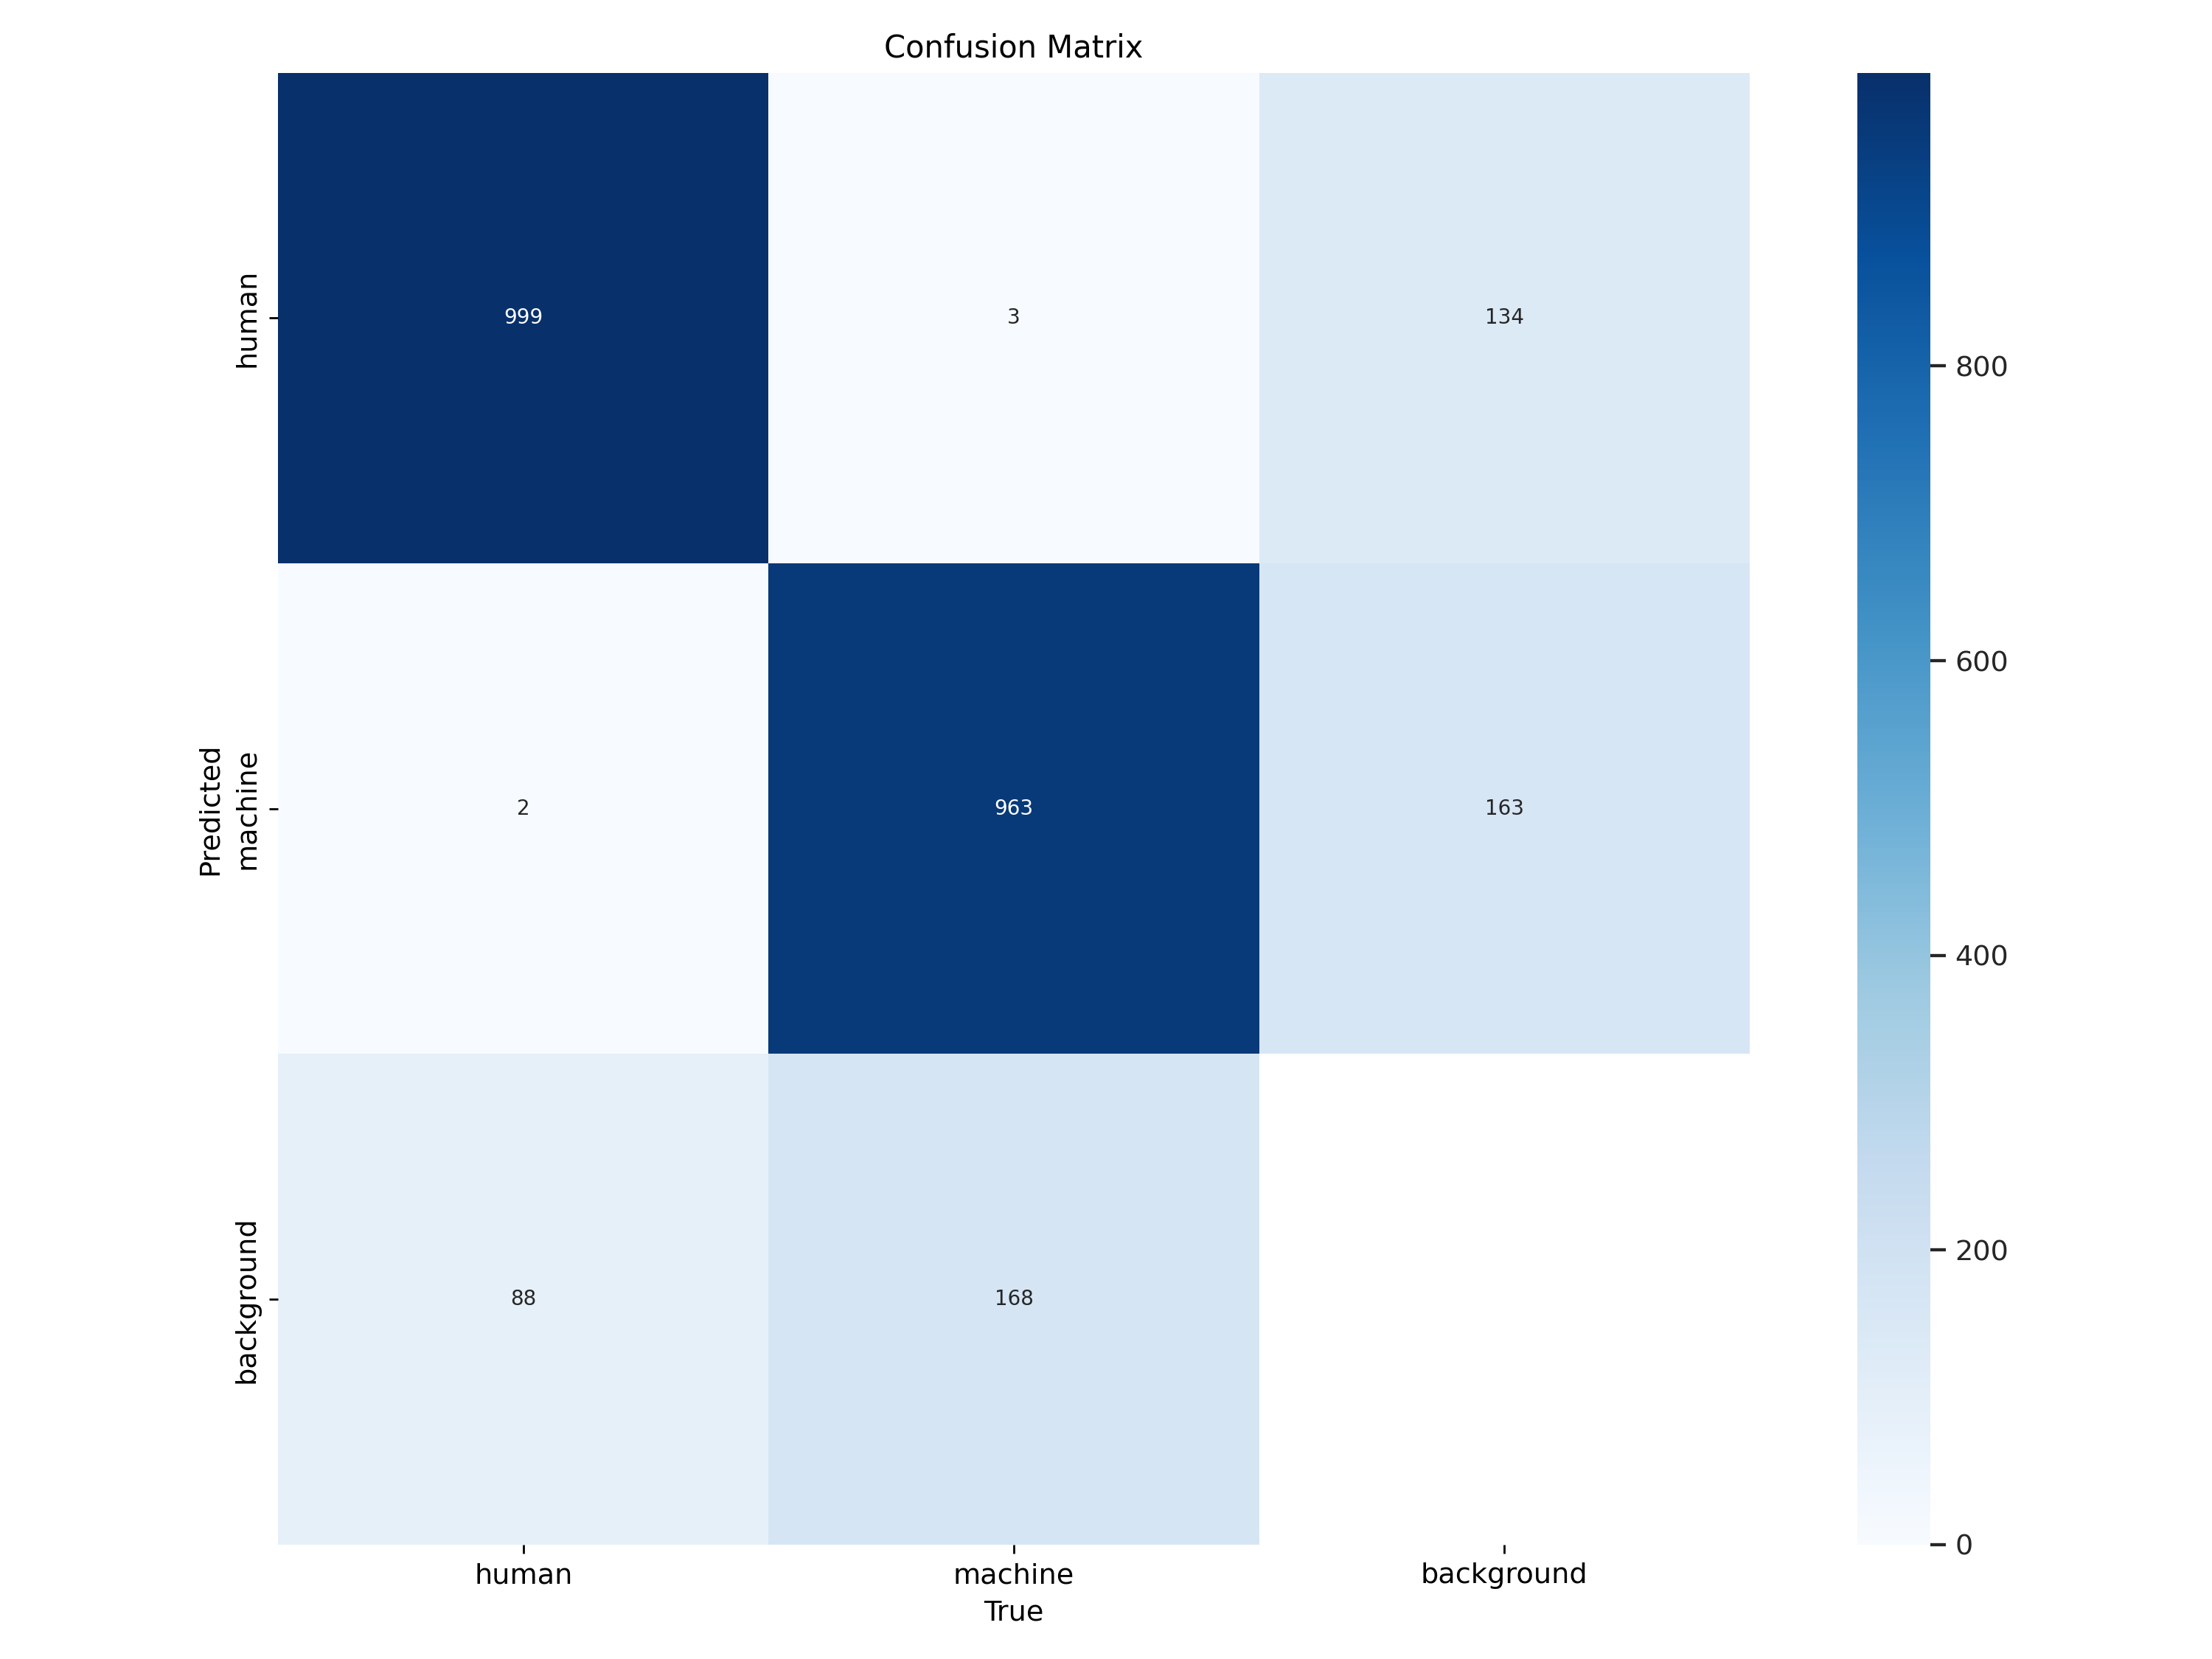

In [22]:
from IPython.display import Image

# Define the path to the confusion matrix image file
confusion_matrix_path = '/content/smart-poultry-farm-litter-raking-3/runs/detect/train2/confusion_matrix.png'

# Display the confusion matrix image
Image(filename=confusion_matrix_path, width=640)

# Visualize the normalized confusion matrix

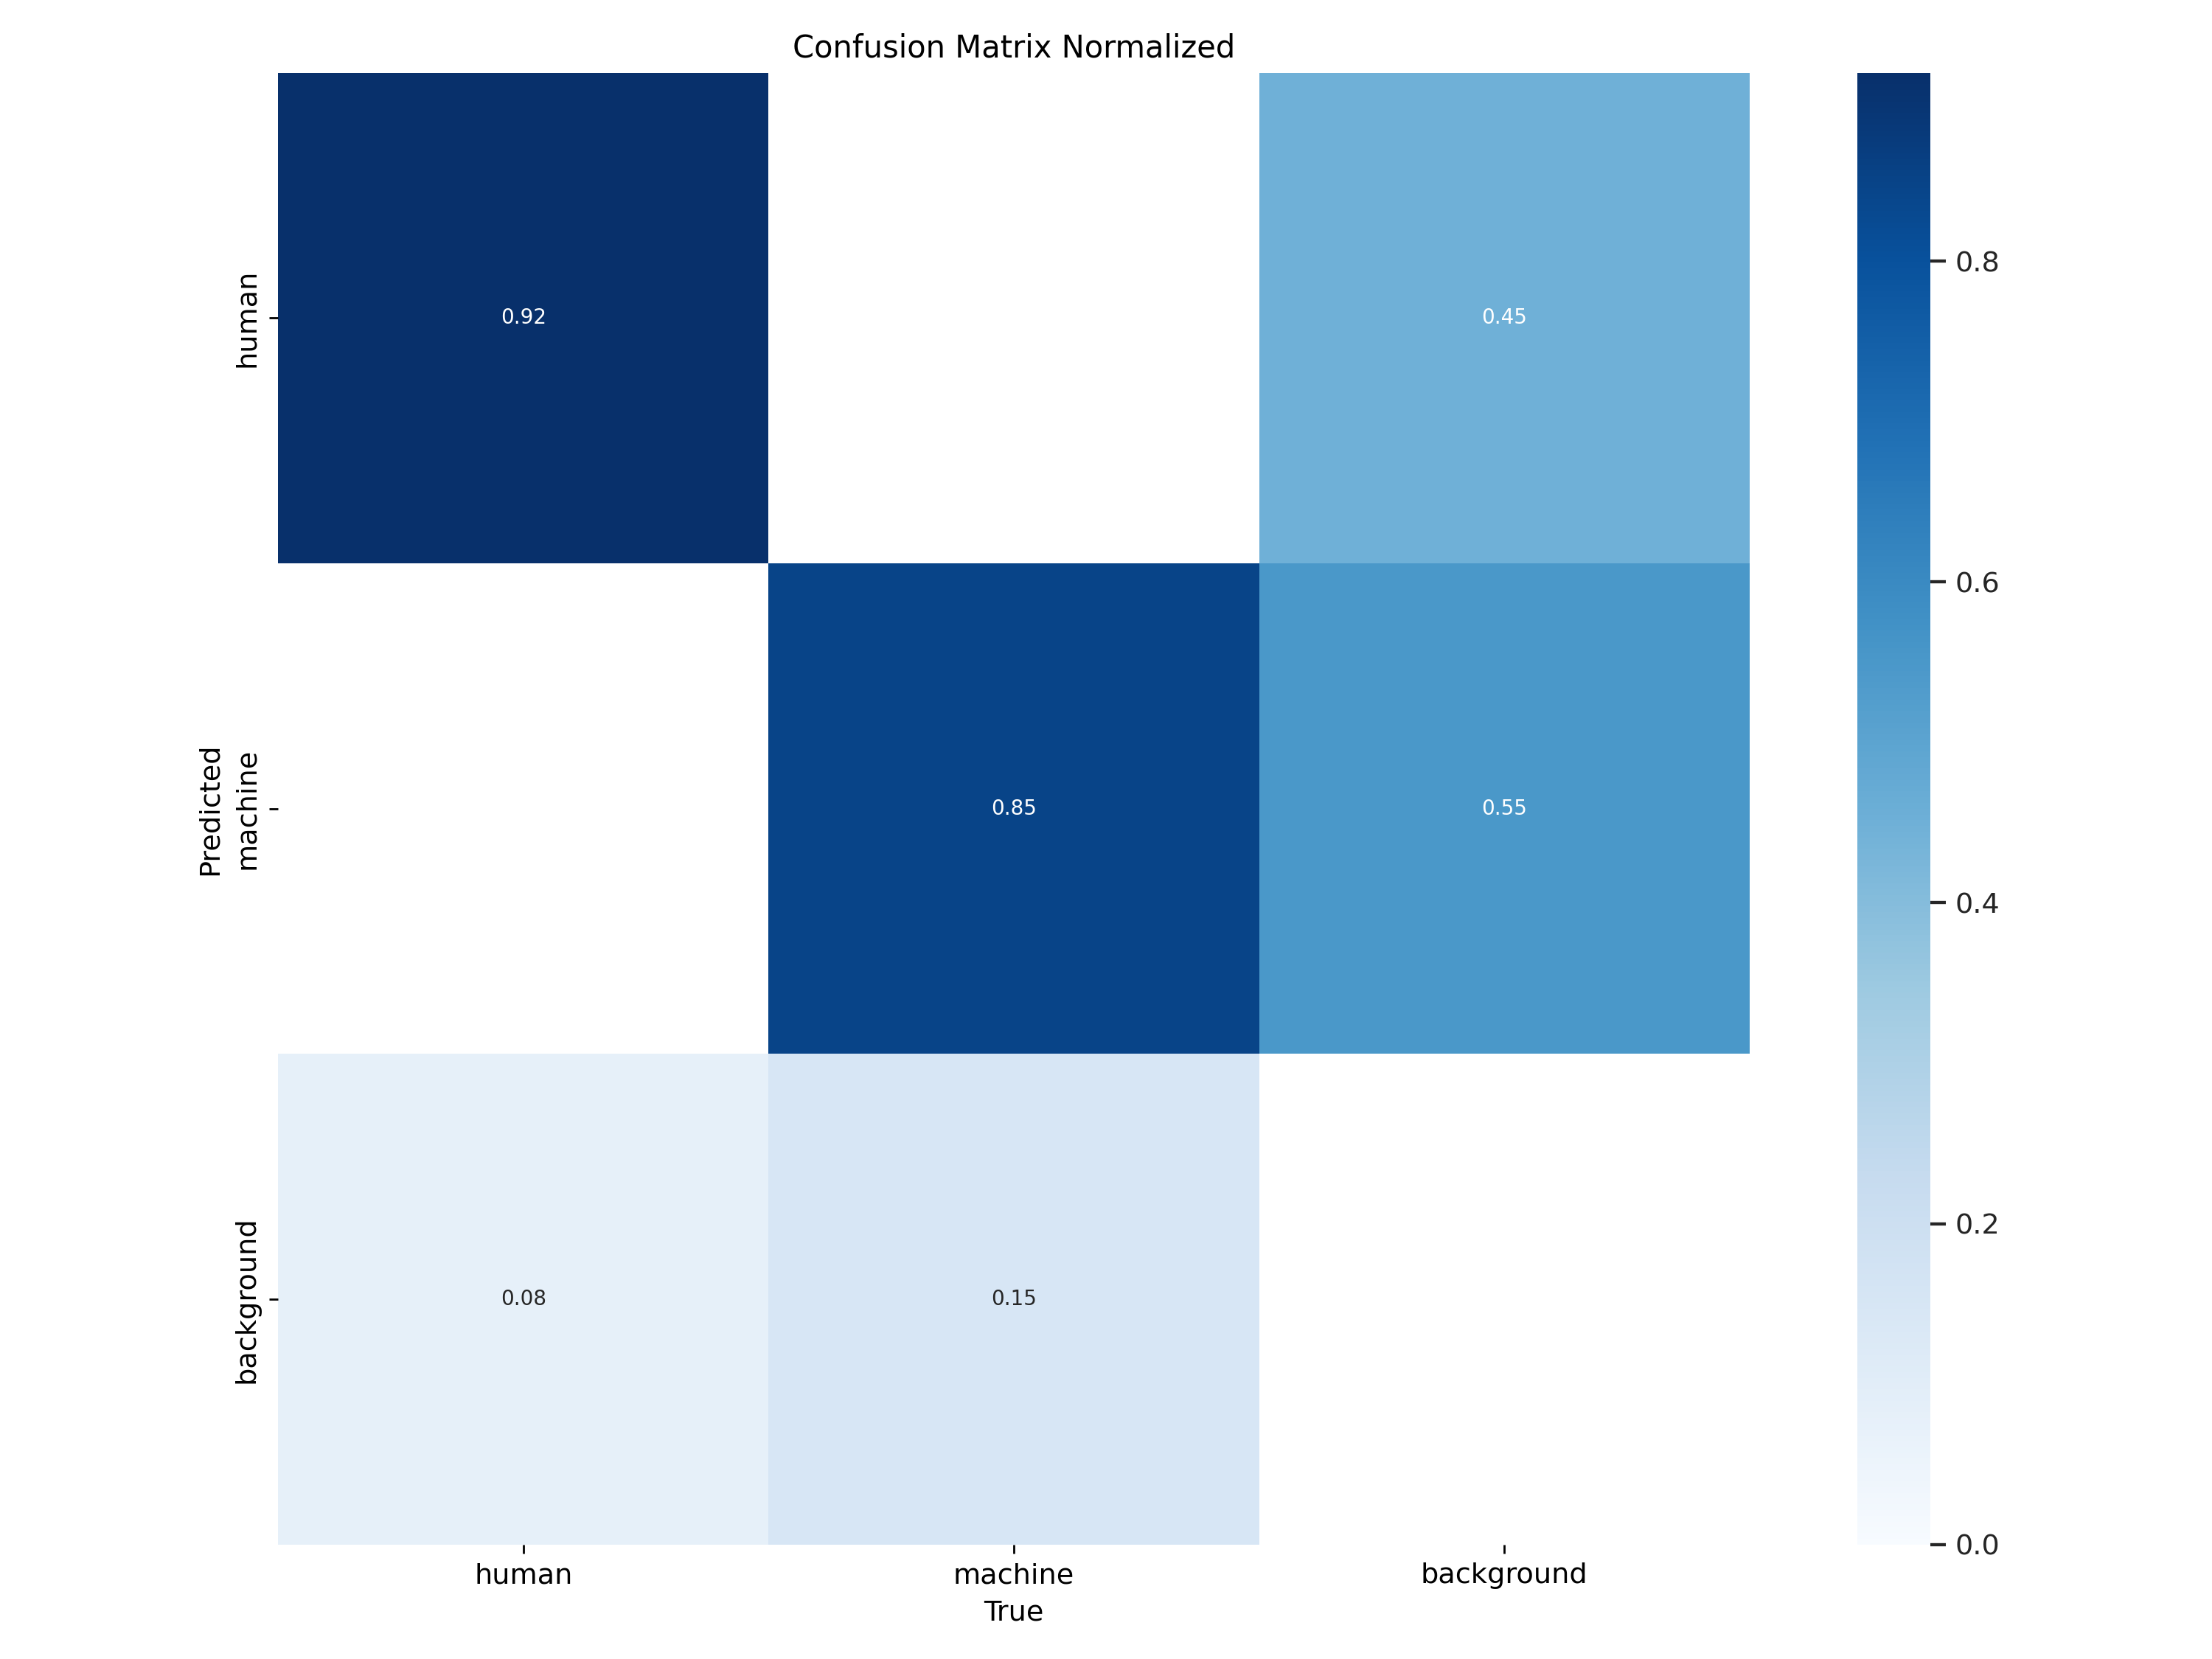

In [24]:
from IPython.display import Image

# Define the path to the confusion matrix image file
confusion_matrix_path = '/content/smart-poultry-farm-litter-raking-3/runs/detect/train2/confusion_matrix_normalized.png'

# Display the confusion matrix image
Image(filename=confusion_matrix_path, width=640)

# Visualize test images along with predictions

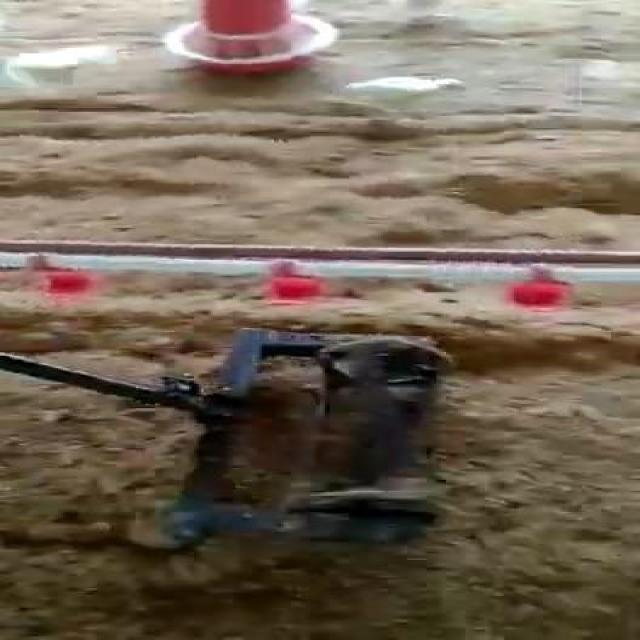

FileNotFoundError: [Errno 2] No such file or directory: '/content/smart-poultry-farm-litter-raking-3/runs/detect/predict/LITTER-RACKING-MACHINE-MANUAL-_-BROILER-FARMING-480P-_mp4-0067_jpg.rf.d36173c2b3e3b8aacdc5b91c3337c4e3.txt'

In [25]:
from IPython.display import Image, display
import os

# Define the directory containing the test images and predictions
test_images_dir = '/content/smart-poultry-farm-litter-raking-3/test/images'
predictions_dir = '/content/smart-poultry-farm-litter-raking-3/runs/detect/predict'

# Get a list of test image filenames
test_images = os.listdir(test_images_dir)

# Display a few sample images along with their predictions
num_samples = 3  # Number of samples to display
for i in range(num_samples):
    # Get the image filename and its corresponding prediction filename
    image_filename = test_images[i]
    prediction_filename = image_filename.replace('.jpg', '.txt')

    # Define the paths to the image and prediction files
    image_path = os.path.join(test_images_dir, image_filename)
    prediction_path = os.path.join(predictions_dir, prediction_filename)

    # Display the image
    display(Image(filename=image_path))

    # Read and display the predictions from the prediction file
    with open(prediction_path, 'r') as f:
        predictions = f.read()
        print(predictions)  # You can modify this to format and display predictions as needed
